In [18]:
df=pd.read_excel("E:\HTL Project\HTL Raw data.xlsx")
df.head()

<IPython.core.display.Javascript object>

,Feedstock,Type,Moisture,Volatile,Ash,Proteins,lipids,carbohydrates,C,H,...,O,S,Culture Condition,Catalyst,Temp,Time,Pressure,HHV,ERR,Yield%
0,Spirulina platensis,microalgae,11.8,67.0,8.6,53.0,7.5,11.0,72.7,8.8,...,11.5,0.6,open pond,Na2CO3,300,30,130,35.2,37.2,36.0
1,Nannochloropsis,microalgae,3.9,67.4,24.4,52.0,14.0,27.0,76.0,10.3,...,9.0,0.8,Flask,H-ZSM5,350,60,180,37.9,42.7,43.0
2,Chlorella vulgaris,microalgae,5.8,67.3,9.5,49.5,11.0,14.2,70.6,9.2,...,12.3,0.4,open pond,LiOH,250,60,100,33.8,33.0,33.0
3,Porphyridium purpureum,microalgae,8.5,61.6,18.5,45.6,12.1,NaN,69.1,8.4,...,15.2,0.5,PBR,NaN,250,30,100,34.8,41.5,24.7
4,Dunaliella tertiolecta,microalgae,4.9,54.4,13.5,34.0,23.0,21.0,72.0,8.8,...,9.9,0.3,NaN,Na2CO3,375,50,221,36.0,64.8,55.3


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Feedstock']=le.fit_transform(df['Feedstock'])
df['Type']=le.fit_transform(df['Type'])
df['Culture Condition']=le.fit_transform(df['Culture Condition'])
df['Catalyst']=le.fit_transform(df['Catalyst'])
df['Moisture']=df['Moisture'].fillna(df['Moisture'].mode()[0])
df['Volatile']=df['Volatile'].fillna(df['Volatile'].mode()[0])
df['carbohydrates']=df['carbohydrates'].fillna(df['carbohydrates'].mode()[0])
df['S']=df['S'].fillna(df['S'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])
df['lipids ']=df['lipids '].fillna(df['lipids '].mode()[0])

In [25]:
x=df.drop('ERR',axis=1)
y=df['ERR']
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#This is for the testing Data
regressor2 = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor2.fit(x_train, y_train)
y_pred =regressor2.predict(x_test)
y_pred
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
#This is for the trainig Data
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(x_train, y_train)
y_pred1 =regressor.predict(x_train)
y_pred1
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  4.536299999999995


<IPython.core.display.Javascript object>

Root mean square error:  3.667608010000012
R2 square:  0.7833163839343911


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  2.118087499999993


<IPython.core.display.Javascript object>

Root mean square error:  0.14330956640624493
R2 square:  0.9093409922053491


In [26]:
params = {
    'max_depth': [2,3,5,10,20],
    'n_estimators': [10,25,30,50,100,200,250]
}

In [27]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=regressor2,
                           param_grid=params,
                           cv = 3,
                           n_jobs=4, verbose=2)

In [28]:
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=4,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'n_estimators': [10, 25, 30, 50, 100, 200, 250]},
             verbose=2)

In [29]:
rf_grid.best_params_

{'max_depth': 20, 'n_estimators': 250}

In [30]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
96,39.8,44.328
5,41.7,30.776
15,31.8,35.940
46,24.3,27.034
50,29.1,32.561


<IPython.core.display.Javascript object>

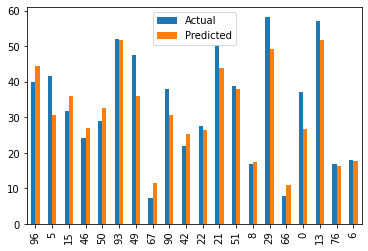

In [31]:
df1 = data
df1.plot(kind='bar')
plt.show()

In [32]:
cross_val_score(regressor2, x, y, cv=10, scoring="r2")

<IPython.core.display.Javascript object>

array([  0.56348327,   0.6669538 ,   0.84937604,  -0.34696749,
        -0.10474907,   0.31558397, -10.13118978,   0.33478067,
         0.82344189,  -3.21715942])

In [33]:
1 - (1-regressor2.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

0.8997759013538892

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

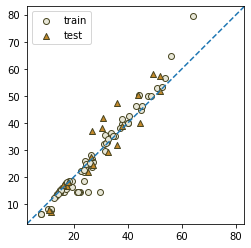

In [34]:
fig, ax = plt.subplots()
ax.scatter(y_pred1,y_train,label='train',color='#e8e7d8',edgecolors='#494623')
ax.scatter(y_pred,y_test,label='test',color='#c3892b',marker ="^",edgecolors='#494623')
#ax.xlabel('Actual Values of HHV',fontsize=14)
#ax.ylabel('Predicted Values of HHV',fontsize=14)
ax.legend()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, '--')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
fig.savefig('/Users/Rishi Chaitanya/Desktop/RF ERR 3.png', dpi=300)

In [35]:
regressor2.predict([[3,1,5.8,67.3,9.5,49.5,11,14.2,58.8,6.5,6.7,27.3,0.2,3,19,350,60,180,29.2,28]])#Chlorella vulgaris

array([29.44])

In [36]:
regressor2.predict([[18,1,6.9,68.5,25.5,53,13,13.5,73,8.2,5.7,12.6,0.5,2,4,350,60,180,33.6,27.1]])#Scenedesmus

array([25.779])

In [37]:
regressor2.predict([[23,0,10,72.3,11.9,8.4,4.3,35.2,51.4,10.2,0.8,36.4,0.2,1,4,380,60,150,26,22]])#Ulva Lactuca

array([16.94])

In [38]:
regressor2.predict([[15,1,6.7,78.9,6.4,51.7,21.8,15.9,52.3,7.4,7.5,31.7,0.1,2,16,300,60,180,23,34]])#Scenedesmus abundans

array([46.844])

In [39]:
regressor2.predict([[4,1,10,72.3,7.6,41.8,8.2,37.8,66.5,7.2,6.8,19,0.4,1,22,300,60,150,32,38.5]])#Chlorogloeopsis fritschii14

array([21.947])